In [ ]:
pip install pykan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
plt.style.use('dark_background')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel("/content/drive/MyDrive/KAN/data.xlsx")
df.head(10)

,Unnamed: 0,Unnamed: 1,Gradation,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Mixture E* Test Data,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Binder Stiffness Data,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,No.,MixNo.,r34,r38,r4,r200,Va,Vbeff,η,fc,...,T,fs,Mea_E*,Mea_f,ASTM Ai-VTSi,NaN,Mea_fs,T,Mea_|G*|,Mea_db
1,NaN,NaN,%,%,%,%,%,%,cP,Hz,...,oC,Hz,psi,deg,A,VTS,Hz,oC,psi,deg
2,1,1,14,23.5,31.3,5.9,3.95,12.23,232.839819,1,...,4.444444,0.159155,1345675.532444,NR,11.232894,-3.786009,0.159155,4.444444,980.749525,54.653655
3,2,1,14,23.5,31.3,5.9,3.95,12.23,232.839819,4,...,4.444444,0.63662,1715366.078613,NR,11.232894,-3.786009,0.63662,4.444444,1611.322319,47.534097
4,3,1,14,23.5,31.3,5.9,3.95,12.23,232.839819,16,...,4.444444,2.546479,2080161.556649,NR,11.232894,-3.786009,2.546479,4.444444,2725.659072,41.924226
5,4,1,14,23.5,31.3,5.9,3.95,12.23,2.058431,1,...,21.111111,0.159155,393684.456684,NR,11.232894,-3.786009,0.159155,21.111111,18.997105,74.679583
6,5,1,14,23.5,31.3,5.9,3.95,12.23,2.058431,4,...,21.111111,0.63662,611230.188234,NR,11.232894,-3.786009,0.63662,21.111111,64.753874,66.980945
7,6,1,14,23.5,31.3,5.9,3.95,12.23,2.058431,16,...,21.111111,2.546479,894168.548414,NR,11.232894,-3.786009,2.546479,21.111111,176.216081,60.081592
8,7,1,14,23.5,31.3,5.9,3.95,12.23,0.056024,1,...,37.777778,0.159155,87705.390651,NR,11.232894,-3.786009,0.159155,37.777778,0.509799,85.055581
9,8,1,14,23.5,31.3,5.9,3.95,12.23,0.056024,4,...,37.777778,0.63662,150441.145248,NR,11.232894,-3.786009,0.63662,37.777778,2.664551,78.137139


In [ ]:
df.shape

(7402, 21)

In [ ]:
X = df.iloc[2:,2:10]
X = X.reset_index(drop=True)
X

,Gradation,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Mixture E* Test Data
0,14,23.5,31.3,5.9,3.95,12.23,232.839819,1
1,14,23.5,31.3,5.9,3.95,12.23,232.839819,4
2,14,23.5,31.3,5.9,3.95,12.23,232.839819,16
3,14,23.5,31.3,5.9,3.95,12.23,2.058431,1
4,14,23.5,31.3,5.9,3.95,12.23,2.058431,4
...,...,...,...,...,...,...,...,...
7395,10,35,51,3.5,8.87,12.376208,0.014823,10
7396,10,35,51,3.5,8.87,12.376208,0.014823,5
7397,10,35,51,3.5,8.87,12.376208,0.014823,1
7398,10,35,51,3.5,8.87,12.376208,0.014823,0.5


In [ ]:
y = df.iloc[2:,13]
y = y.reset_index(drop = True)
y

0       1345675.532444
1       1715366.078613
2       2080161.556649
3        393684.456684
4        611230.188234
             ...      
7395      40620.409987
7396      33931.723584
7397      22842.595122
7398       19466.82487
7399      13789.547952
Name: Unnamed: 13, Length: 7400, dtype: object

In [ ]:
X.isna().sum()

Gradation               0
Unnamed: 3              0
Unnamed: 4              0
Unnamed: 5              0
Unnamed: 6              0
Unnamed: 7              0
Unnamed: 8              0
Mixture E* Test Data    0
dtype: int64

In [ ]:
y.isna().sum()

0

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=3, train_size=.7)
x_train.shape, y_train.shape, x_test.shape, y_test.shape
smote = SMOTE(random_state = 14)

x_train.shape, y_train.shape, x_test.shape, y_test.shape
x_train = MinMaxScaler().fit_transform(x_train)
x_test = MinMaxScaler().fit_transform(x_test)

In [ ]:
x_train.shape

(5180, 8)

In [ ]:
y_train = y_train.astype(np.float32)

In [ ]:
y_test = y_test.astype(np.float32)

In [ ]:
dataset = {}
import torch
dataset['train_input'] = torch.from_numpy(x_train)
dataset['test_input'] = torch.from_numpy(x_test)
dataset['train_label'] = torch.from_numpy(np.array(y_train))
dataset['test_label'] = torch.from_numpy(np.array(y_test))

In [ ]:
from kan import *
# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
model = KAN(width=[2,5,1], grid=5, k=3, seed=0)

In [ ]:
# create dataset f(x,y) = exp(sin(pi*x)+y^2)
f = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]]) + x[:,[1]]**2)
dataset = create_dataset(f, n_var=2)
dataset['train_input'].shape, dataset['train_label'].shape

(torch.Size([1000, 2]), torch.Size([1000, 1]))

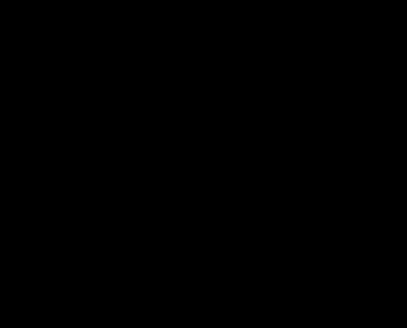

In [ ]:
# plot KAN at initialization
model(dataset['train_input']);
model.plot(beta=100)

In [ ]:
# train the model
model.train(dataset, opt="LBFGS", steps=20, lamb=0.01, lamb_entropy=10.);

train loss: 1.33e-01 | test loss: 1.38e-01 | reg: 2.99e+01 : 100%|██| 20/20 [00:07<00:00,  2.78it/s]


In [ ]:
model.prune()
model.plot(mask=True)